##Manuela Guisao Sepulveda CC.1007053840

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp

In [ ]:
#ecuacion parametrica
def alcance(R,theta,v0x,v0y,b,g):
  ecu= (g/b+ v0y)*(R/v0x) + (g/b**2)*np.log(1-R*b/v0x)
  return ecu

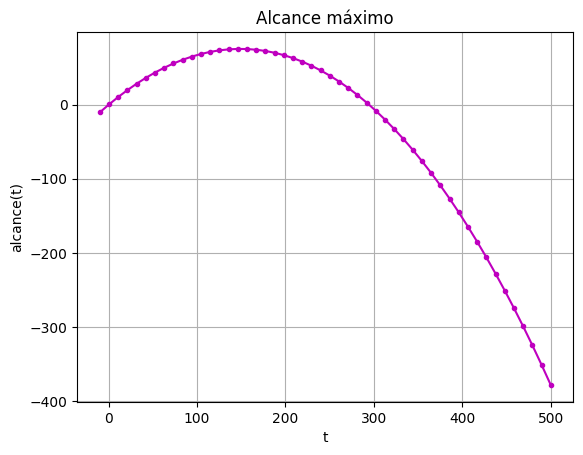

In [160]:
x=np.linspace(-10,500,50)
def alcance(R,theta,v0x,v0y,b,g):
  ecu= (g/b+ v0y)*(R/v0x) + (g/(b**2))*np.log(1-(R*b)/v0x)
  return ecu

theta=np.deg2rad(45)
y= alcance(x,theta,55*np.cos(theta),55*np.sin(theta),0.009,9.8)
plt.plot(x,y, '.m-')
plt.title('Alcance máximo')
plt.xlabel('t')
plt.ylabel('alcance(t)')
plt.grid()

In [163]:
#hallando raices por metodo de secante
b=0.005
g=9.8
theta= np.deg2rad(45)
v0x=55*np.cos(theta)
v0y=55*np.sin(theta)

ec= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)

raiz= optimize.newton(ec,500)
print(f'el alcance maximo R es {raiz}')

el alcance maximo R es 300.6920766931697


In [164]:
#hallar la misma raiz con el metodo de punto fijo
b=0.005
g=9.8
theta= np.deg2rad(45)
v0x=55*np.cos(theta)
v0y=55*np.sin(theta)

ec= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)
fixed= lambda R: R-ec(R)

raiz_puntofijo= optimize.fixed_point(fixed,500)
print(f'el alcance maximo R por el metodo de punto fijo es {raiz_puntofijo}')

el alcance maximo R por el metodo de punto fijo es 300.69207669320923


In [ ]:
#tiempo de vuelo con la raiz hallada con el metodo de secante, y los parametros dados en el punto b
v0x=55*np.cos(theta)
b=0.005
R= raiz
tv= -1/b*np.log(1-R*b/v0x)
print(f'el tiempo de vuelo es {tv} segundos')

el tiempo de vuelo es 7.885101833163649 segundos


In [ ]:
#tiempo de vuelo con la raiz hallada en punto fijo
v0x=55*np.cos(theta)
b=0.005
R= raiz_puntofijo
tv= -1/b*np.log(1-R*b/v0x)
print(f'el tiempo de vuelo es {tv} segundos')

el tiempo de vuelo es 7.885101833164712 segundos


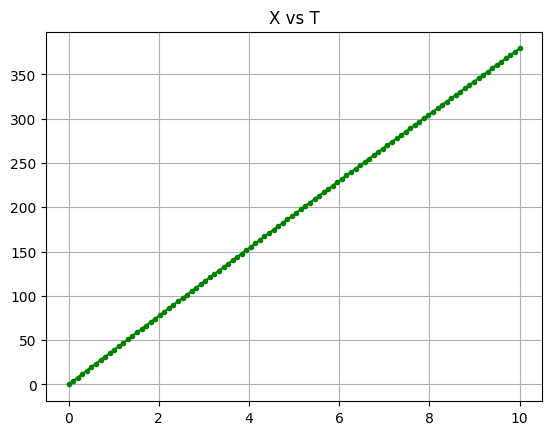

In [ ]:
#gráficas x vs t
theta= np.deg2rad(45)
v0x=55*np.cos(theta)
b= 0.005

tiempo= np.linspace(0,10,100)
x= lambda t:  (v0x/b)*(1-np.exp(-b*t)) #ecuacion posicion de xx
func= x(tiempo)

plt.plot(tiempo,func, '.g-')
plt.title('X vs T')
plt.grid()

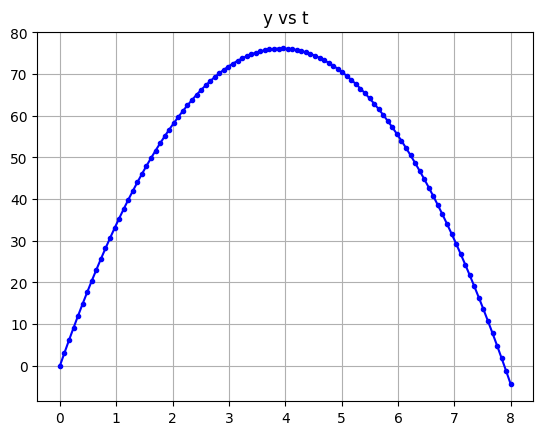

In [ ]:
#graficas y vs t
time=np.linspace(0,8,100)
theta=np.deg2rad(45)
v0y= 55*np.sin(theta)
b=0.005
y= lambda t: (1/b)*((g/b)+v0y)*(1-np.exp(-b*t))-(g/b)*t #ecuacion para la posicion y
yt= y(time)

plt.plot(time,yt, '.b-')
plt.title('y vs t')
plt.grid()

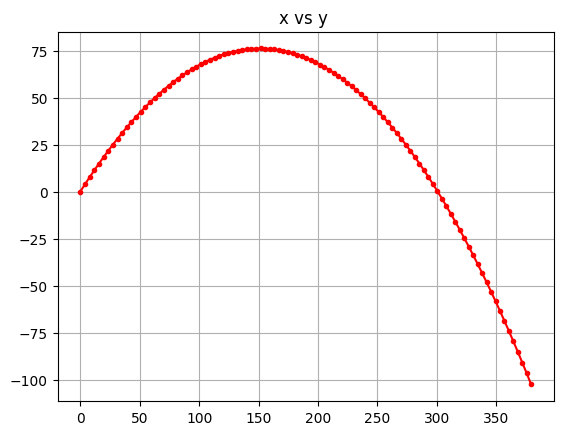

In [ ]:
#grafica de x vs y
yt= y(time) #del paso anterior
func= x(tiempo) #del paso anterior

plt.plot(func,yt, '.r-')
plt.title('x vs y ')
plt.grid()

In [165]:
#quinto punto
def alcance(R,theta,v0):
  g=9.8
  b=0.009
  theta1=np.deg2rad(theta)
  v0x=v0*np.cos(theta1)
  v0y=v0*np.sin(theta1)

  ecu= (g/b+ v0y)*(R/v0x) + (g/b**2)*np.log(1-R*b/v0x)
  return ecu

theta2=np.arange(0,90,5)
raiz_intervalo=np.zeros(len(theta2))
contador=0
for i in theta2:
  alcancemax= optimize.newton(alcance,150,args=(i,40))
  raiz_intervalo[contador]=alcancemax
  contador=contador +1

for i in range(0,len(theta2)):
  print(f'para el angulo:{theta2[i]}, se tiene un alcance maximo:{raiz_intervalo[i]}')


para el angulo:0, se tiene un alcance maximo:1.728790398193479e-05
para el angulo:5, se tiene un alcance maximo:28.230148289185472
para el angulo:10, se tiene un alcance maximo:55.368601623954156
para el angulo:15, se tiene un alcance maximo:80.60916747083499
para el angulo:20, se tiene un alcance maximo:103.21229431322804
para el angulo:25, se tiene un alcance maximo:122.52570349281119
para el angulo:30, se tiene un alcance maximo:138.00196717537142
para el angulo:35, se tiene un alcance maximo:149.2126532224374
para el angulo:40, se tiene un alcance maximo:155.85877308730346
para el angulo:45, se tiene un alcance maximo:157.77738132500915
para el angulo:50, se tiene un alcance maximo:154.94428205519327
para el angulo:55, se tiene un alcance maximo:147.47289662985193
para el angulo:60, se tiene un alcance maximo:135.60943641294
para el angulo:65, se tiene un alcance maximo:119.72460416184926
para el angulo:70, se tiene un alcance maximo:100.3021166991657
para el angulo:75, se tiene un

In [166]:
def tiempo_vuelo1(R,theta,v0,b):
  theta2=np.deg2rad(theta)
  tv=(-1/b)*np.log(1-(R*b/(v0*np.cos(theta2))))
  return tv

rho=np.arange(0,90,5) #para evitar confusiones
time=[]
for i in range(len(rho)):
  tiempo_valores= tiempo_vuelo1(raiz_intervalo[i],rho[i],40,0.009)
  time.append(tiempo_valores)
  print(f'para el angulo {rho[i]} el tiempo de vuelo es {time[i]}')

para el angulo 0 el tiempo de vuelo es 4.321975995380676e-07
para el angulo 5 el tiempo de vuelo es 0.7107177718903998
para el angulo 10 el tiempo de vuelo es 1.4145347893224656
para el angulo 15 el tiempo de vuelo es 2.1061547396144555
para el angulo 20 el tiempo de vuelo es 2.7804053104883666
para el angulo 25 el tiempo de vuelo es 3.432274512333424
para el angulo 30 el tiempo de vuelo es 4.056944997530801
para el angulo 35 el tiempo de vuelo es 4.649826243701241
para el angulo 40 el tiempo de vuelo es 5.206584498192328
para el angulo 45 el tiempo de vuelo es 5.723170407732891
para el angulo 50 el tiempo de vuelo es 6.19584427992211
para el angulo 55 el tiempo de vuelo es 6.621198942097087
para el angulo 60 el tiempo de vuelo es 6.996180178267099
para el angulo 65 el tiempo de vuelo es 7.318104736488905
para el angulo 70 el tiempo de vuelo es 7.584675907521398
para el angulo 75 el tiempo de vuelo es 7.793996681256142
para el angulo 80 el tiempo de vuelo es 7.944580490567791
para el a

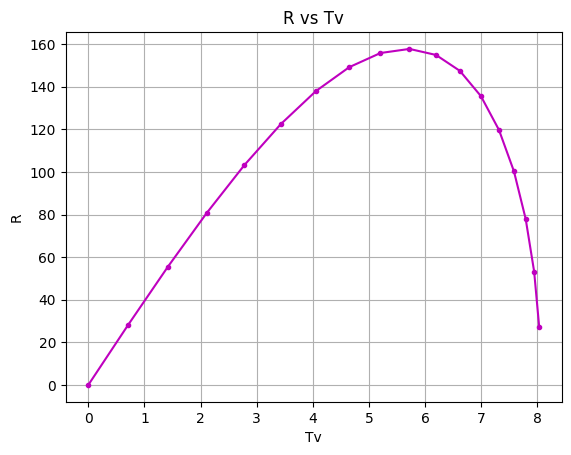

In [124]:
#sexto punto
plt.plot(time,raiz_intervalo, '.m-')
plt.title('R vs Tv')
plt.xlabel('Tv')
plt.ylabel('R')
plt.grid()

Text(0.5, 1.0, 'trayectorias para cada angulo')

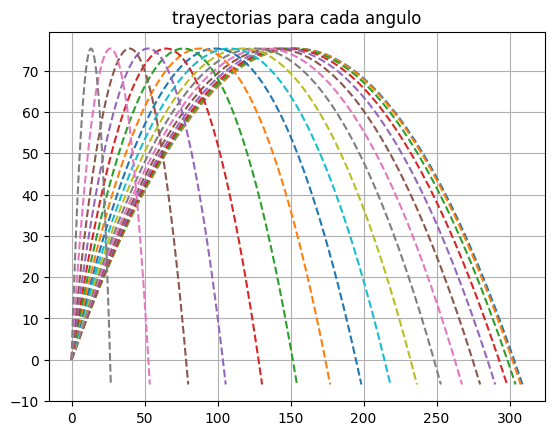

In [159]:
#septimo punto
def trx(t,theta):
  theta=np.deg2rad(theta)
  v0x=40*np.cos(theta)
  b=0.009
  x=(v0x/b)*(1-np.exp(-b*t)) #ecuacion posicion de x
  return x
def tryy(t,theta):
  theta=np.deg2rad(theta)
  v0x=40*np.sin(theta)
  b=0.009
  g=9.8
  y=(1/b)*((g/b)+v0y)*(1-np.exp(-b*t))-(g/b)*t #ecuacion para la posicion y
  return y

dominio=np.linspace(0,8)
for i in range(len(theta2)):
  plt.plot(trx(dominio,theta2[i]),tryy(dominio,theta2[i]), '--')
plt.grid()
plt.title('trayectorias para cada angulo')

